In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm,binom,geom
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Aerofit_case_study.txt') #Load dataset

In [4]:
df.info() #Statisics of all features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


All columns have non null values, hence no missing values in whole dataset  
Total rows - 180  
Total features - 8

# Lets explore individual features

There are 3 Aerofit treadmil products - KP281, KP481, KP781

In [5]:
df.Product.unique() #unique values in Product column, there are 3 products in current dataset

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [6]:
df.Product.value_counts() #distribution of Product

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [7]:
df.Product.value_counts()/len(df)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

__Pie Chart to display volume of different product purchase__  
KP281 is most popular product with 44% market share out of 3 products

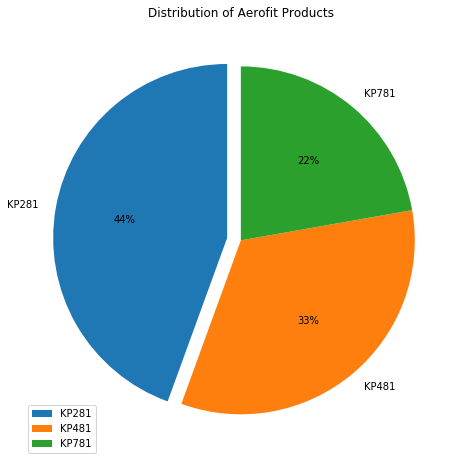

In [8]:
plt.figure(figsize=(10,8))
plt.pie(round(df.Product.value_counts()/len(df)*100,2),labels=list(df.Product.value_counts().index),startangle=90,
       autopct='%.0f%%',explode=(0.08,0,0))
plt.legend()
plt.title('Distribution of Aerofit Products',fontsize=12)
plt.show()

Descriptive statistics of column - Age

In [9]:
print('Unique Age Values -',df.Age.nunique(),'\nMin Age -',df.Age.min(),'\nMax Age -',df.Age.max(),'\nMean Age -',df.Age.mean(),'\nMedian Age -',df.Age.median())

Unique Age Values - 32 
Min Age - 18 
Max Age - 50 
Mean Age - 28.788888888888888 
Median Age - 26.0


In [10]:
df.describe(include='all') #Statistics of whole df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Gender distribution

In [11]:
print(df.Gender.value_counts(),end='\n') 
print(df.Gender.unique(),end='\n')
print(df.Gender.mode(),end='\n')

Male      104
Female     76
Name: Gender, dtype: int64
['Male' 'Female']
0    Male
dtype: object


Marital Status distribution

In [12]:
print(df.MaritalStatus.value_counts(),end='\n') 
print(df.MaritalStatus.unique(),end='\n')
print(df.MaritalStatus.mode(),end='\n')

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
['Single' 'Partnered']
0    Partnered
dtype: object


In [13]:
#Lets get statistics of Age values to find outliers
Q1=np.percentile(df.Age,25)
Q3=np.percentile(df.Age,75)
IQR=Q3-Q1
Upper_Whisker=Q3+1.5*IQR
Lower_Whisker=Q1-1.5*IQR
print("Upper Whisker- ",Upper_Whisker,"\nLower Whisker- ",Lower_Whisker)

Upper Whisker-  46.5 
Lower Whisker-  10.5


__BOX PLOT__  
Age box plot displays outliers above 46.5

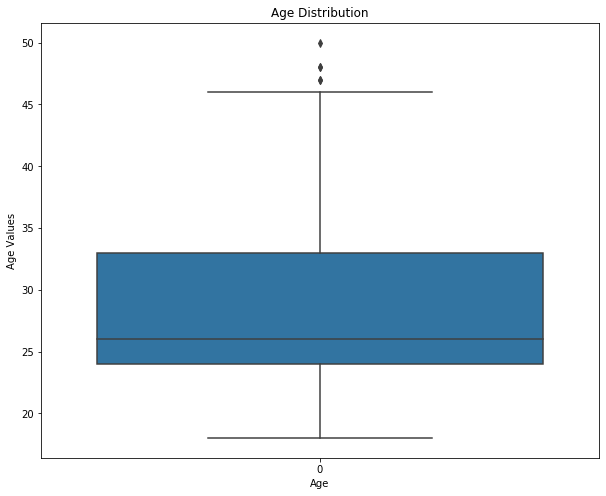

In [14]:
#All values above 46.5 are outliers, lets plot boxplot to visualize
plt.figure(figsize=(10,8))
sns.boxplot(df.Age)
plt.xlabel("Age")
plt.ylabel("Age Values")
plt.title("Age Distribution")
plt.show()

Histplot of Age Vs count of products, People with Age between 24 and 26 are active and highest purchaser.

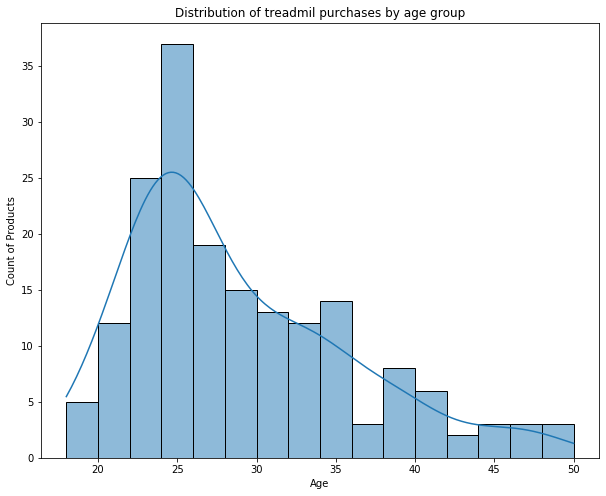

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Age',bins=16,kde=True)
plt.xlabel("Age")
plt.ylabel("Count of Products")
plt.title("Distribution of treadmil purchases by age group")
plt.show()

Lets create new category Age Group to segregate different ages of customers 

In [16]:
df['AgeGroup']=np.nan

In [17]:
lst_index=list(df[(df['Age']>=18) & (df['Age']<=25)].index)
df.loc[lst_index,'AgeGroup']='18_25'
lst_index=list(df[(df['Age']>=26) & (df['Age']<=35)].index)
df.loc[lst_index,'AgeGroup']='26_35'
lst_index=list(df[(df['Age']>=36) & (df['Age']<=50)].index)
df.loc[lst_index,'AgeGroup']='36_50'

Lets create new category Income Group to segregate different income ranges of customers

In [18]:
df['IncomeGroup']=np.nan

In [19]:
lst_index=list(df[(df['Income']>=29000) & (df['Age']<=44000)].index)
df.loc[lst_index,'IncomeGroup']='low'
lst_index=list(df[(df['Income']>=44001) & (df['Age']<=50000)].index)
df.loc[lst_index,'IncomeGroup']='mid'
lst_index=list(df[(df['Income']>=50001) & (df['Age']<=58000)].index)
df.loc[lst_index,'IncomeGroup']='high'
lst_index=list(df[(df['Income']>=58001)].index)
df.loc[lst_index,'IncomeGroup']='very high'

__Distribution of products purchases vs Age Group__   
__Business Insights -__  
Customers with age between 18 and 25 are most active, highest purchaser of all products than customers with age older than 25.

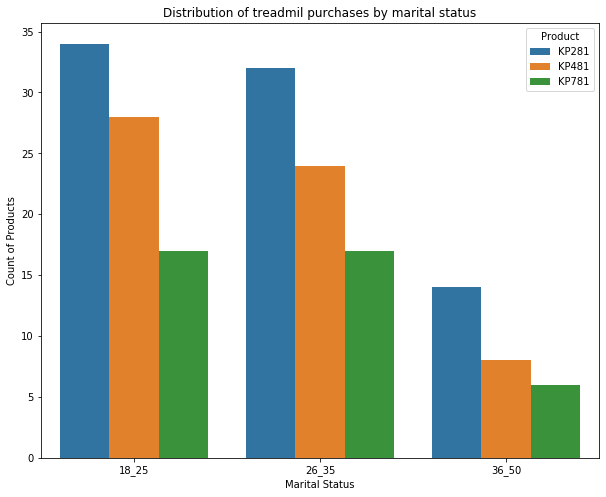

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='AgeGroup',hue='Product')
plt.xlabel("Marital Status")
plt.ylabel("Count of Products")
plt.title("Distribution of treadmil purchases by marital status")
plt.show()

__Distribution of products purchases by Marital status__  
__Business Inights-__  
Married customers have high chances of buying trademil than single customers, both Male and Female

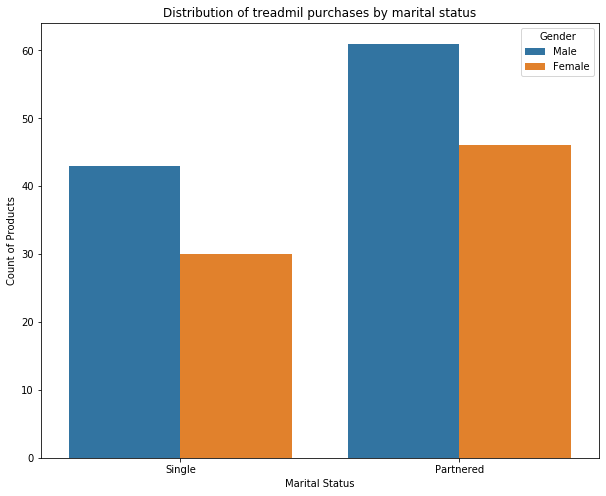

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='MaritalStatus',hue='Gender')
plt.xlabel("Marital Status")
plt.ylabel("Count of Products")
plt.title("Distribution of treadmil purchases by marital status")
plt.show()

Average and Median usage of treadmil is 3 days per week

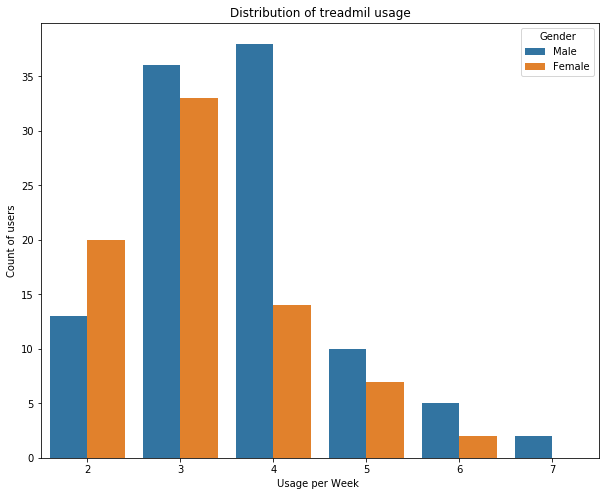

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Usage',hue='Gender')
plt.xlabel("Usage per Week ")
plt.ylabel("Count of users")
plt.title("Distribution of treadmil usage")
plt.show()

__Business Insights-__  
Customers with income between 40000 and 60000 are likely purchaser of treadmil

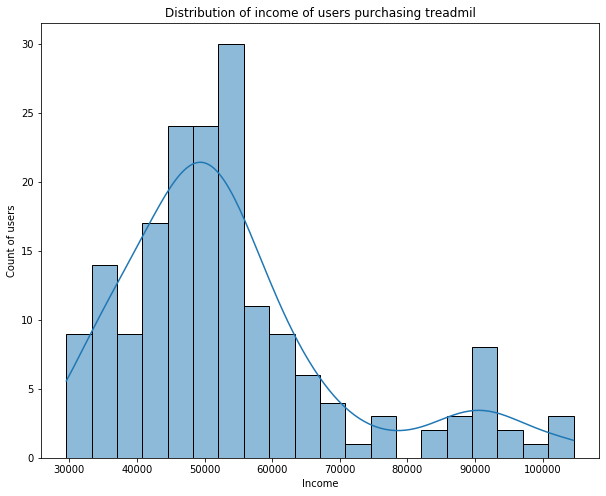

In [23]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='Income',bins=20,kde=True)
plt.xlabel("Income")
plt.ylabel("Count of users")
plt.title("Distribution of income of users purchasing treadmil")
plt.show()

__Business Insights-__  
Average customers rating themselves 3 (medium fit), so not lot of novice customers.

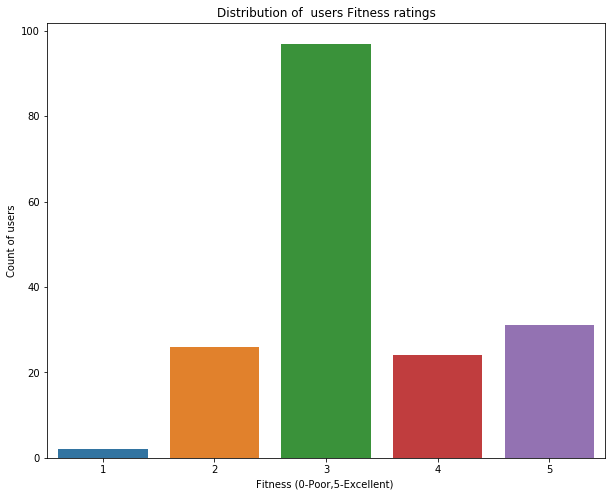

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Fitness')
plt.xlabel("Fitness (0-Poor,5-Excellent) ")
plt.ylabel("Count of users")
plt.title("Distribution of  users Fitness ratings")
plt.show()

__Bivariate Analysis__  
Gender Vs Product type

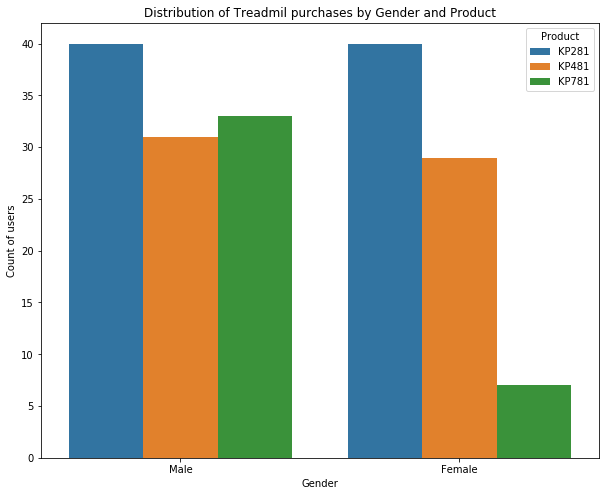

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Gender',hue='Product')
plt.xlabel("Gender")
plt.ylabel("Count of users")
plt.title("Distribution of Treadmil purchases by Gender and Product")
plt.show()

__Age Vs Annual Income Vs Product Type__  
__Business Insights -__  
    1. High income group of customers are more likely to purchase KP781(high cost), also income is increasing as age increases
    2. KP281 and KP481 are popular among low income group, all entry and mid level runners wanted to try low cost product before upgrading to more advanced (high cost) product

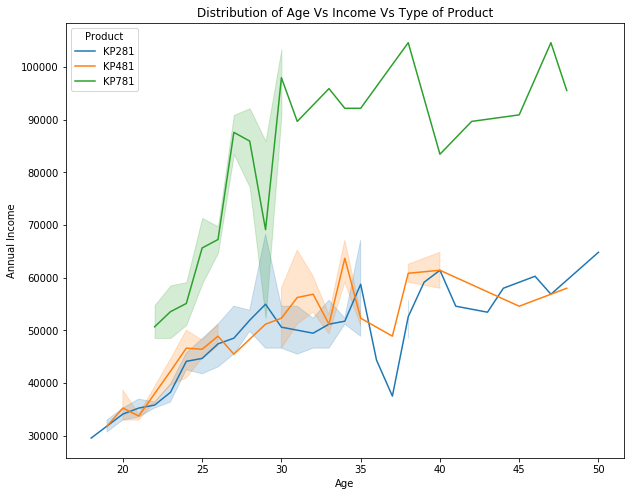

In [26]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Age',y='Income',hue='Product')
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Distribution of Age Vs Income Vs Type of Product")
plt.show()

__Business Insights-__  
Median age of customer higher for advanced treadmils or older customers have more chances to purchase advanced (high cost) product than younger customers

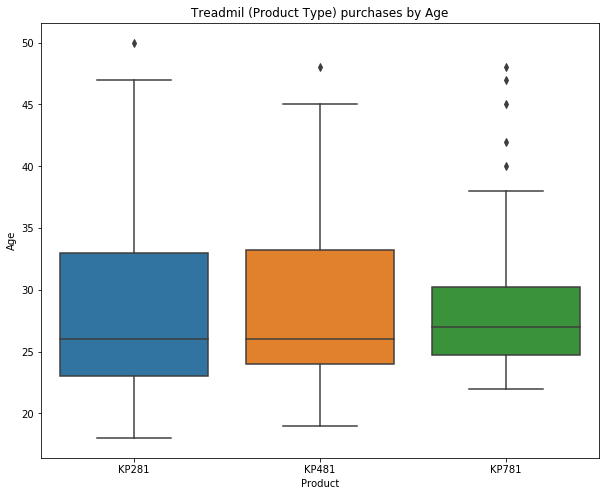

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Product',y='Age')
plt.xlabel("Product")
plt.ylabel("Age")
plt.title("Treadmil (Product Type) purchases by Age")
plt.show()

Positive relationship between Income and grade of Treadmil,as high income customers can afford advanced treadmil

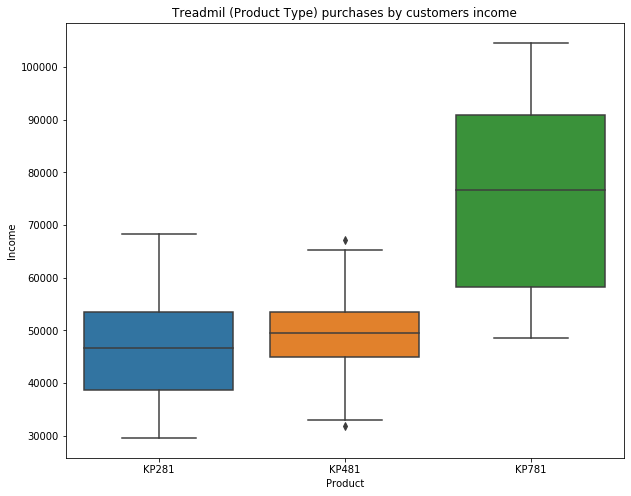

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Product',y='Income')
plt.xlabel("Product")
plt.ylabel("Income")
plt.title("Treadmil (Product Type) purchases by customers income")
plt.show()

Mean income of customers purchasing KP781 is way higher than rest of customers group

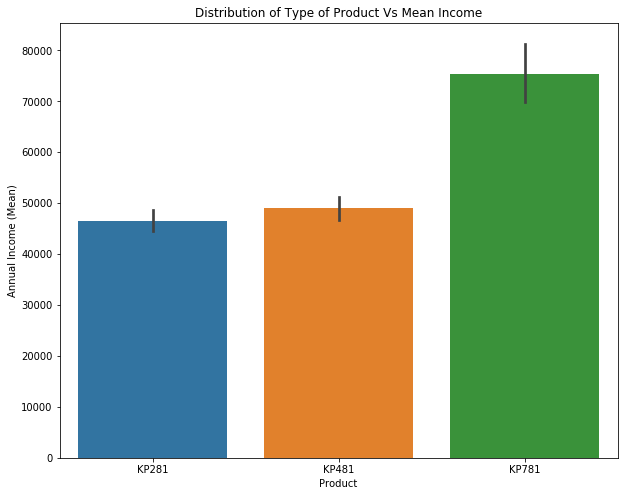

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(x='Product',y='Income' ,data=df , estimator=np.mean)
plt.xlabel("Product")
plt.ylabel("Annual Income (Mean)")
plt.title("Distribution of Type of Product Vs Mean Income")
plt.show()

__Business Insights-__  
KP781 customers have high weekly usage than other 2 products, as it is having advanced features, most active/fit customers prefer KP781.

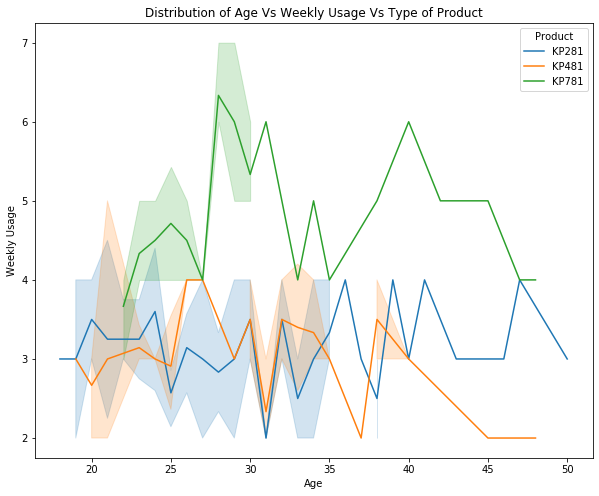

In [30]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Age',y='Usage',hue='Product')
plt.xlabel("Age")
plt.ylabel("Weekly Usage")
plt.title("Distribution of Age Vs Weekly Usage Vs Type of Product")
plt.show()

**Business Insights -**   
    1. Treadmil usage,miles,fitness are positively co-related.
    2. Education and Income are positively co-related as well as Age and Income.


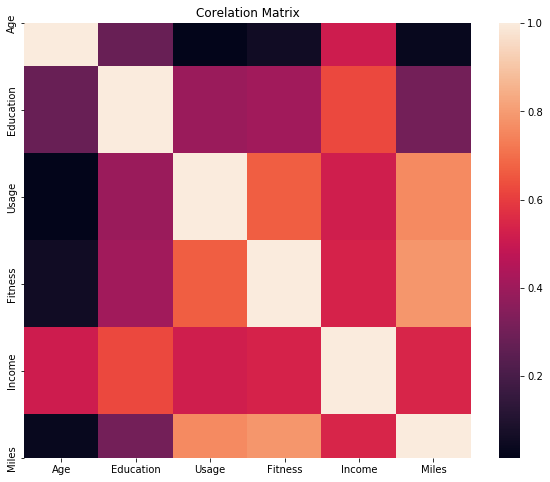

In [31]:
#Heatmap for corelation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title("Corelation Matrix")
plt.show()

<Figure size 864x576 with 0 Axes>

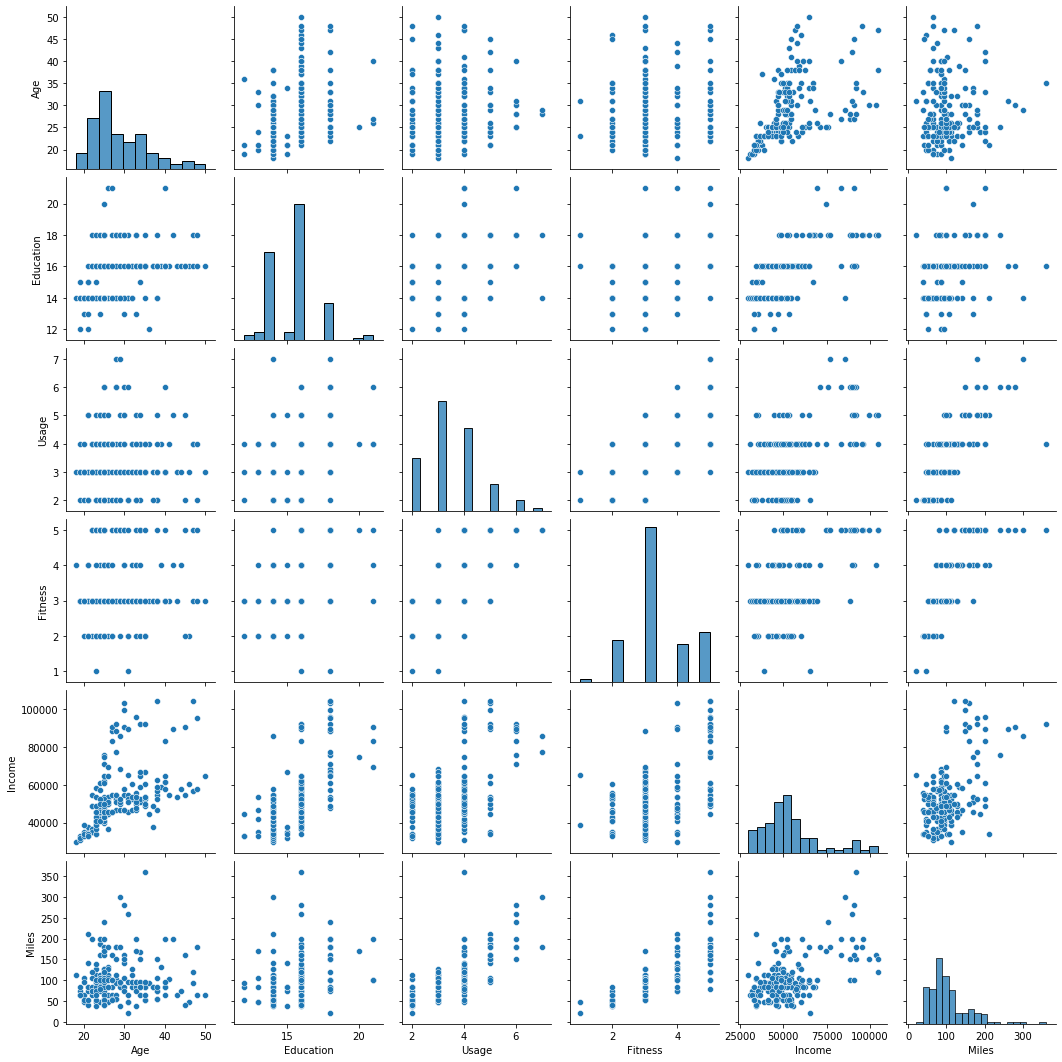

In [32]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df)
plt.show()

# Probablity and Statistics -
1. Relation between Gender, Marital Sttaus and Product they choose  
    . __KP281 - Total- 44.44%, Male- 50% and Female- 50%__  
    . __KP481 - Total- 33.33%, Male- 51.6% and Female- 48.3%__  
    . __KP781 - Total- 22.22%, Male- 82.5% and Female- 17.5%__  
    . __Male - 57.7%__  
    . __Female - 42.2%__  
    . __Partnered - 59.4%__  
    . __Single - 40.5%__  

__Business Insights-__  
    1. KP281 is more popular product than other two, reasons is low Price, young customers using more treadmil 

__There is 57.78% probability of Male customers purchasing treadmil than female customers 42.22%__    
Overall Male customers have purchased more treadmil than female customers.

In [33]:
pd.crosstab(df.Product,df.Gender,margins=True,normalize=True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


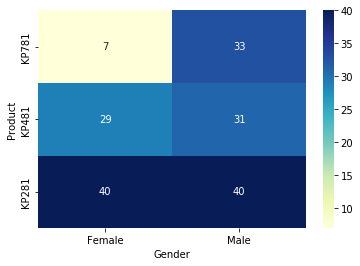

In [34]:
ax=sns.heatmap(pd.crosstab(df.Product, df.Gender),
            cmap="YlGnBu", annot=True, cbar=True,xticklabels=True, yticklabels=True)
ax.set_ylim([0,3])
plt.show()

In [35]:
pd.crosstab(df.Product,df.Gender,margins=True)
#KP281 - Male- 50% and Female- 50%
#KP481 - Male- 51.6% and Female- 48.3%
#KP781 - Male- 82.5% and Female- 17.5%

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


__51.66% chance that customer is Male given that they have purchased KP481__

In [36]:
#Probability of Customer being Male given that they purchased KP481
#p(M|KP481)= p(KP481|M)*P(M)/P(KP481)
((31/104)*(104/180)/(60/180))*100

51.66666666666666

__50% chance that customer is Female given that they have purchased KP281__

In [37]:
#Probability of Customer being Female given that they purchased KP281
#p(F|KP281)= p(KP281|F)*P(F)/P(KP281)
((40/76)*(76/180)/(80/180))*100

50.0

__29.8% chance the customer purchased KP481 given that they are Male__

In [38]:
#Probability of Customer purchased KP481 given that they are Male 
#p(KP481|M)= p(M|KP481)*p(KP481)/P(M)
((31/60)*(60/180)/(104/180))*100

29.807692307692314

__31.73% chance the customer purchased KP781 given that they are Male__

In [39]:
#Probability of Customer purchased KP781 given that they are Male 
#p(KP781|M)= p(M|KP781)*p(KP781)/P(M)
((33/40)*(40/180)/(104/180))*100

31.73076923076923

__38.46% chance the customer purchased KP281 given that they are Male__

In [40]:
#Probability of Customer purchased KP281 given that they are Male 
#p(KP281|M)= p(M|KP281)*p(KP281)/P(M)
((40/80)*(80/180)/(104/180))*100

38.46153846153847

__52.63% chance the customer purchased KP281 given that they are Female__

In [41]:
#Probability of Customer purchased KP281 given that they are Female 
#p(KP281|F)= p(F|KP281)*p(KP281)/P(F)
((40/80)*(80/180)/(76/180))*100

52.63157894736842

__38.15% chance the customer purchased KP481 given that they are Female__

In [42]:
#Probability of Customer purchased KP481 given that they are Female 
#p(KP481|F)= p(F|KP481)*p(KP481)/P(F)
((29/60)*(60/180)/(76/180))*100

38.1578947368421

__9.21% chance the customer purchased KP781 given that they are Female__

In [43]:
#Probability of Customer purchased KP781 given that they are Female 
#p(KP781|F)= p(F|KP781)*p(KP781)/P(F)
((7/40)*(40/180)/(76/180))*100

9.210526315789473

In [44]:
pd.crosstab(df.Product,df.MaritalStatus,margins=True,normalize=True)
#Married customers have 59.4% to buy Treadmil over Single customers of 40.5%

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


__33.75% probability that customer is partnered female given they have purchased KP281__

In [45]:
#Probability of customer being female partnered given they have purchased KP281
#p(FP|KP281)=p(KP281|FP)*p(FP)/p(KP281)
(27/46)*(46/180)/(80/180)*100

33.75

In [46]:
pd.crosstab(df.Product,[df.Gender,df.MaritalStatus],margins=True)

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                27     13        21     19   80
KP481                15     14        21     10   60
KP781                 4      3        19     14   40
All                  46     30        61     43  180

__23.68% chance that customer will purchase KP281 given that they are Female and Aged between 26-35__

In [47]:
#Probability of Customer purchased KP281 given that they are Female and between Age- 26 to 35
#p(KP281|F)= p(F|KP281)*p(KP281)/P(F)
((18/80)*(80/180)/(76/180))*100

23.684210526315788

In [48]:
pd.crosstab(df.Product,[df.Gender,df.AgeGroup],margins=True)

Gender   Female              Male              All
AgeGroup  18_25 26_35 36_50 18_25 26_35 36_50     
Product                                           
KP281        17    18     5    17    14     9   80
KP481        12    13     4    16    11     4   60
KP781         3     4     0    14    13     6   40
All          32    35     9    47    38    19  180

Customers falling into high or very high category are only users of KP781( exception of 5 mid level income customers)  
__65.21% chances that customer will purchase KP781 given they have veru high income(>58K)__

In [49]:
#Probability of Customer purchased KP781 given that they lie in high income bucket
#p(KP781|VH)= p(VH|KP781)*p(KP781)/P(VH)
((30/40)*(40/180)/(46/180))*100

65.21739130434783

In [50]:
pd.crosstab(df.Product,[df.IncomeGroup],margins=True)

IncomeGroup,high,low,mid,very high,All
Product,,,,,
KP281,25,30,18,7,80
KP481,21,15,15,9,60
KP781,5,0,5,30,40
All,51,45,38,46,180


__54.55% probability that customer will purchase KP781 given their usage in more than 5 days a week__

In [51]:
#Probability of purchasing KP781P treadmil given that treadmil usage is greater than equal to 5 days a week
#p(KP781|U>=5)= p(U>=5|KP781)*p(KP781)/(p(U>=5|KP781)P(KP781)+P(U>=5|(KP281&KP481)*p((KP281&KP481))))
((21/26)*(40/180))/((21/26)*(40/180)+(5/26)*(140/180))*100

54.54545454545454

In [52]:
pd.crosstab(df.Product,[df.Usage],margins=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
All,33,69,52,17,7,2,180


__Among KP781 users, 72.5% users reported High Fitness Rating which means they are efficiently using treadmil and follows fitness routine.__

In [53]:
#Total favourable/total outcomes
29/40

0.725

In [54]:
pd.crosstab(df.Product,[df.Fitness],margins=True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


# Recommendation/Actionable Insights -
    1. Female customers have very high probability to purchase KP281(Entry level) treadmil, Aerofit should try to focus on female customers by launching exciting offers on high end treadmils, elaborating benefits of advanced treadmils, and how female can be more active so they look for advanced products.
      
    2. Number of customers is inversely propotional to cost of treadmil, hence Aerofit should try to optimize/lower the cost of advanced machines so that entry level customers would be converted to purchase mid-level or advanced treadmils.
      
    3. Usage and fitness of customers are directly proportional to level of treadmil they purchase, so Aerofit should run campaigns involving entry level customers to make them aware about benefits of fitness, and how advanced features of treadmil can help them so that they can be automatically attracted to advanced treadmils based on features they provide.
      
    4. Partnered customers are more favourable to purchase treadmil as both partner can use machine or perhaps advanced machine to match expection of both partners, hence Aerofit should run specific promotions targetting this set of people.
      
    5. Customers income and age decides which treadmil they are planning to purchase, so Aerofit can attract more customers by targetting suitable products based on their income, age, marital status, fitness level.  
      
